<a href="https://colab.research.google.com/github/MinsooKwak/Data_Analysis/blob/main/Anomal_Detect/exmaple01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[EXPORT]**  
**┗ 기본편🎉**
---

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

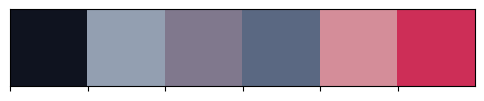

In [141]:
sns.palplot(['#0F131F','#939FB1','#80788D','#5A6882','#D48D99','#CD2E57'])

## **🔒 [제조] 문제**
---
* **제시된 제조 데이터(Time Series, 시계열)를 대상으로 아래 주어진 문제를 분석 및 시각화 하시오**

* 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|datetime|시간|
|Accelerometer1RMS|진동 가속도1|
|Accelerometer2RMS|진동 가속도2|
|Current |전기모터 암페어(Ampere)|
|Pressure|워터 펌프 후 루프의 압력(Bar) |
|Temperature|엔진의 온도(섭씨 온도)|
|Thermocouple|순환 루프에서 유체의 온도(섭씨 온도)|
|Voltage|전기 모터의 전압(Volt)|
|RateRMS|루프 내부의 유체의 순환 유량(Liter/min)|
|anomaly|이상여부|
|changepoint|변경점 여부|

In [3]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir("/content/drive/MyDrive/DA_degree/과제/3주차_제조/데이터")
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/DA_degree/과제/3주차_제조/데이터'

In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv('example_1.csv', sep=";")
df.head(3)

,datetime,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
0,2020-03-09 16:16:30,0.027545,0.041127,0.673506,0.054711,67.8345,24.3164,240.513,32.0,0.0,0.0
1,2020-03-09 16:16:31,0.027997,0.039100,0.772264,0.054711,67.8704,24.3279,229.523,32.0,0.0,0.0
2,2020-03-09 16:16:32,0.028418,0.038872,0.675520,0.054711,67.7882,24.3261,242.708,32.0,0.0,0.0
3,2020-03-09 16:16:33,0.027625,0.039366,0.566279,-0.273216,67.7918,24.3323,229.709,32.0,0.0,0.0
4,2020-03-09 16:16:34,0.027484,0.041854,1.292170,0.054711,67.7368,24.3250,242.746,32.0,0.0,0.0


### Question 01

```
Data Read하고 상위 전처리 조건을 적용한 DataFrame을 만드시오.

  (1) Data shape(형태) 출력 → 전체 데이터의 Row와 Column개수 출력

  (2) Data type 확인 → 각 Column별 Data Type 출력

  (3) Null값 확인 (※ 빈 값의 Data) → 각 Column별 Null Value의 개수 출력
```

1. Data Shape

In [5]:
df.shape

(1063, 11)

2. Data Type

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   datetime             1063 non-null   object 
 1   Accelerometer1RMS    1063 non-null   float64
 2   Accelerometer2RMS    1063 non-null   float64
 3   Current              1063 non-null   float64
 4   Pressure             1063 non-null   float64
 5   Temperature          1063 non-null   float64
 6   Thermocouple         1063 non-null   float64
 7   Voltage              1063 non-null   float64
 8   Volume Flow RateRMS  1063 non-null   float64
 9   anomaly              1063 non-null   float64
 10  changepoint          1063 non-null   float64
dtypes: float64(10), object(1)
memory usage: 91.5+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Accelerometer1RMS,1063.0,0.027663,0.000333,0.026455,0.027434,0.027674,0.027892,0.028554
Accelerometer2RMS,1063.0,0.040037,0.001086,0.036972,0.039276,0.040098,0.040828,0.043122
Current,1063.0,1.195240,7.113407,0.394058,0.753505,1.002720,1.194580,232.734000
Pressure,1063.0,0.048541,0.270689,-0.929070,0.054711,0.054711,0.054711,1.038490
Temperature,1063.0,67.895174,0.695198,66.201900,67.412450,67.955000,68.515500,69.098200
Thermocouple,1063.0,24.265096,0.021573,24.217000,24.252950,24.267200,24.277450,24.332300
Voltage,1063.0,229.924824,13.259556,0.580776,223.570000,230.634000,236.960000,254.125000
Volume Flow RateRMS,1063.0,31.472275,1.314535,28.040000,31.039050,32.000000,32.038900,33.000000
anomaly,1063.0,0.313264,0.464039,0.000000,0.000000,0.000000,1.000000,1.000000
changepoint,1063.0,0.003763,0.061256,0.000000,0.000000,0.000000,0.000000,1.000000


3. Null값 확인

In [8]:
df.isnull().sum()

datetime               0
Accelerometer1RMS      0
Accelerometer2RMS      0
Current                0
Pressure               0
Temperature            0
Thermocouple           0
Voltage                0
Volume Flow RateRMS    0
anomaly                0
changepoint            0
dtype: int64

In [74]:
df.datetime = pd.to_datetime(df['datetime'])

In [76]:
df['datetime'].dt.year.unique()

array([2020], dtype=int32)

In [80]:
print(f'최소 : {min(df.datetime)}')
print(f'최대 : {max(df.datetime)}')

최소 : 2020-03-09 16:16:30
최대 : 2020-03-09 16:36:30


### Question 02

```
01번 문제에서 Read한 데이터를 활용하여, 다음 시각화를 진행하시오.

  (1) 전체 데이터의 개수에서 'anomaly'가 차지하는 비율은?
  
  (2) 'Accelerometer1RMS','Accelerometer2RMS','Current','Pressure','Temperature','Thermocouple','Voltage','Volume Flow RateRMS'
  총 8개의 Column 대상으로 총 8개의 Trend 그래프를 시각화 하시오.
  (※ x = 'datetime', y= 각 Column)

  (3) 시각화만 Trend 그래프 위에 'anomaly'가 1인 데이터에 대해서 이상 포인트를 표시하시오.
  (※ Trend 그래프에서 이상 Point를 구별할 수 있는 방법이라면 자유롭게 표현 가능)

```

1. Anomaly가 차지하는 비율

In [9]:
round((df['anomaly'].value_counts(normalize=True)*100),2).to_frame()

,proportion
anomaly,
0.0,68.67
1.0,31.33


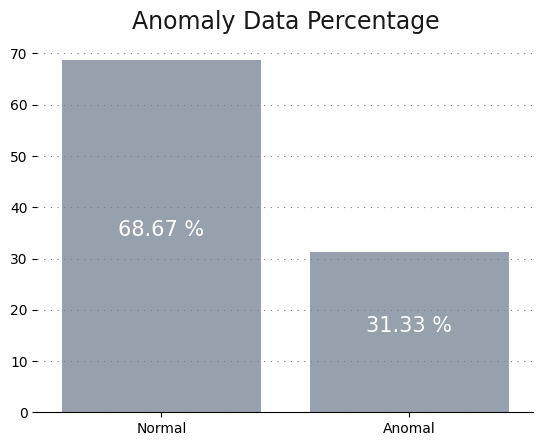

In [55]:
fig, ax = plt.subplots()
ax.grid(color='gray', linestyle='--', axis='both', zorder=0, dashes=(1,5))
sns.barplot(df['anomaly'].value_counts(normalize=True)*100, color='#939FB1')

for p in ax.patches:
  ax.text(p.get_x() + (p.get_width()/2),                # 가로 위치
          (p.get_y() + p.get_height())/2,               # 세로 위치 중간
          f"{p.get_height():.2f} %",                    # 값 (둘째 자리까지)
          ha = 'center',
          color = 'white',
          fontsize='15')

# 축 지우기
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)


ax.set_title('Anomaly Data Percentage', fontsize=17, pad=10, alpha=0.9)
ax.set_xlabel('')                                       # labelpad=12 (띄어쓰기)
ax.set_ylabel('')
ticklabel = ['Normal', 'Anomal']
plt.xticks([0.0,1.0],ticklabel)
plt.show()

2. 트랜드 그래프

1) Accelerometer 1RMS

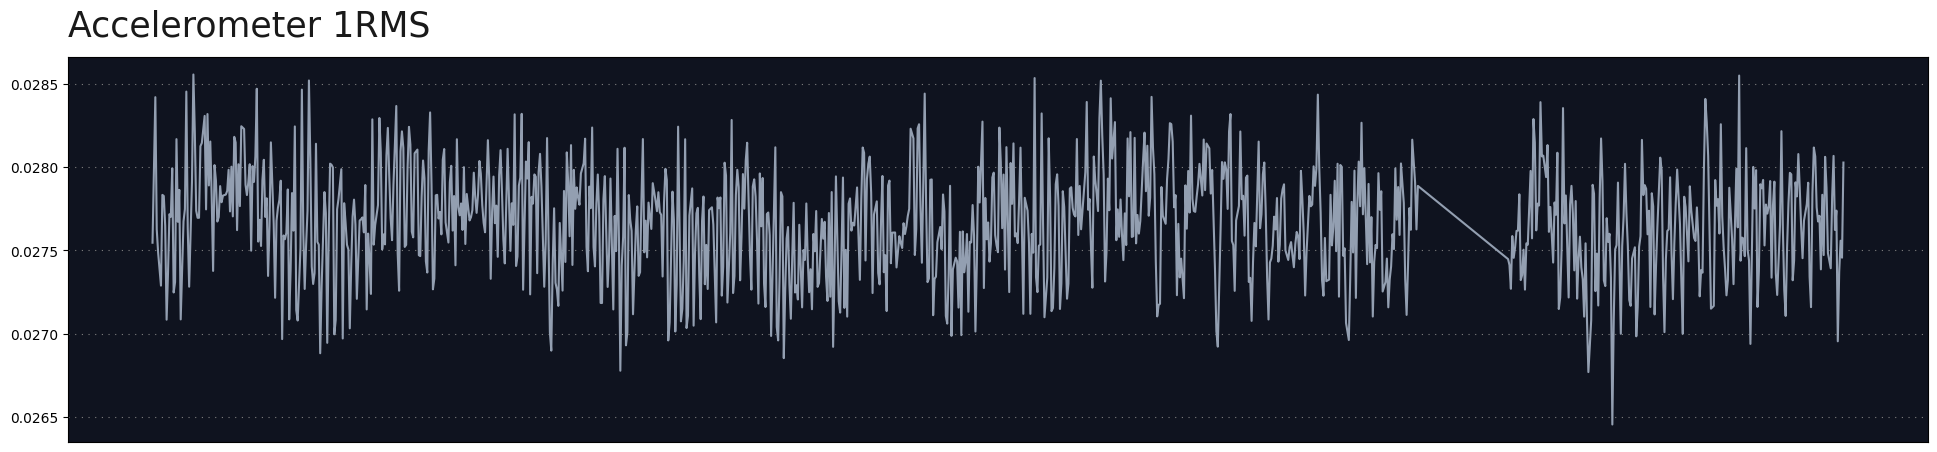

In [104]:
background_d = '#0F131F'
fig, ax = plt.subplots(figsize=(24,5))
ax.set_facecolor(background_d)
ax.grid(color='gray', linestyle='--', axis='both', zorder=0, dashes=(1,5))
sns.lineplot(df, x='datetime',y='Accelerometer1RMS', label='Accelerometer1RMS', color='#939FB1')
ax.set_xticks([])
ax.set_title('Accelerometer 1RMS',loc='left', fontsize=25, pad=15, alpha=0.9)
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend().set_visible(False)

2) Accelerometer 2RMS

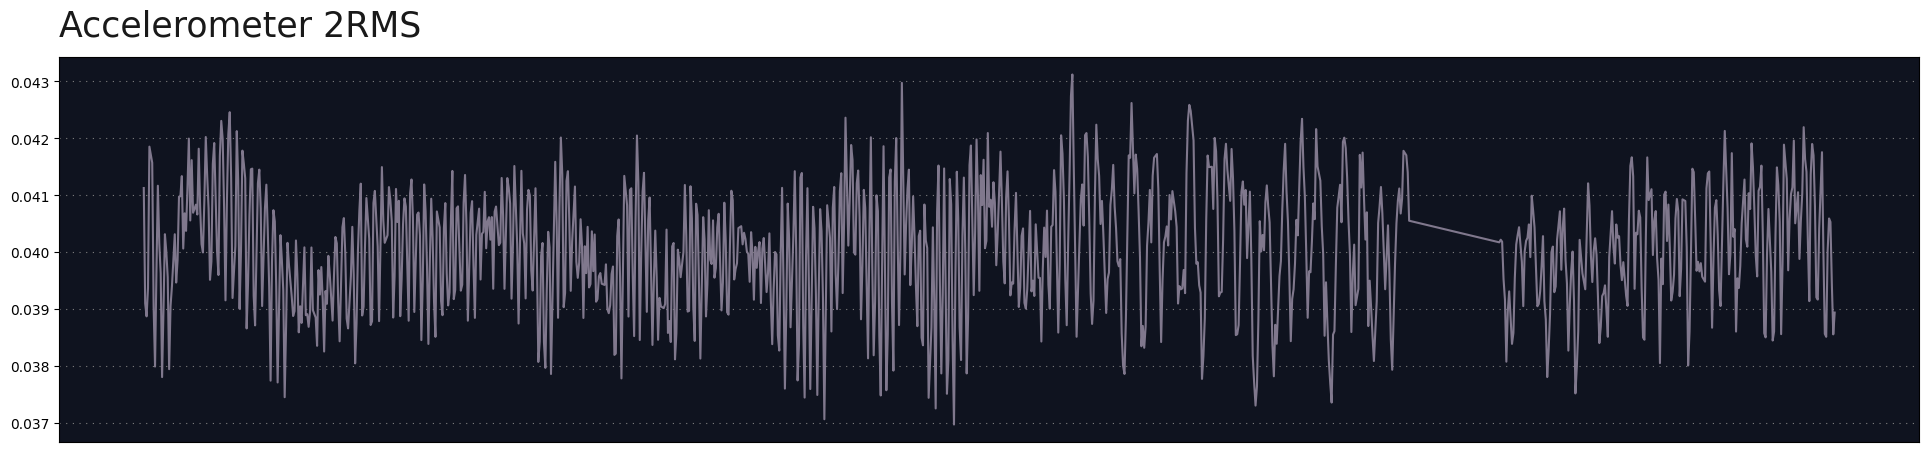

In [106]:
fig, ax = plt.subplots(figsize=(24,5))
ax.set_facecolor(background_d)
ax.grid(color='gray', linestyle='--', axis='both', zorder=0, dashes=(1,5))
sns.lineplot(df, x='datetime',y='Accelerometer2RMS', label='Accelerometer2RMS', color='#80788D')
ax.set_xticks([])
ax.set_title('Accelerometer 2RMS',loc='left', fontsize=25, pad=15, alpha=0.9)
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend().set_visible(False)

3) Current

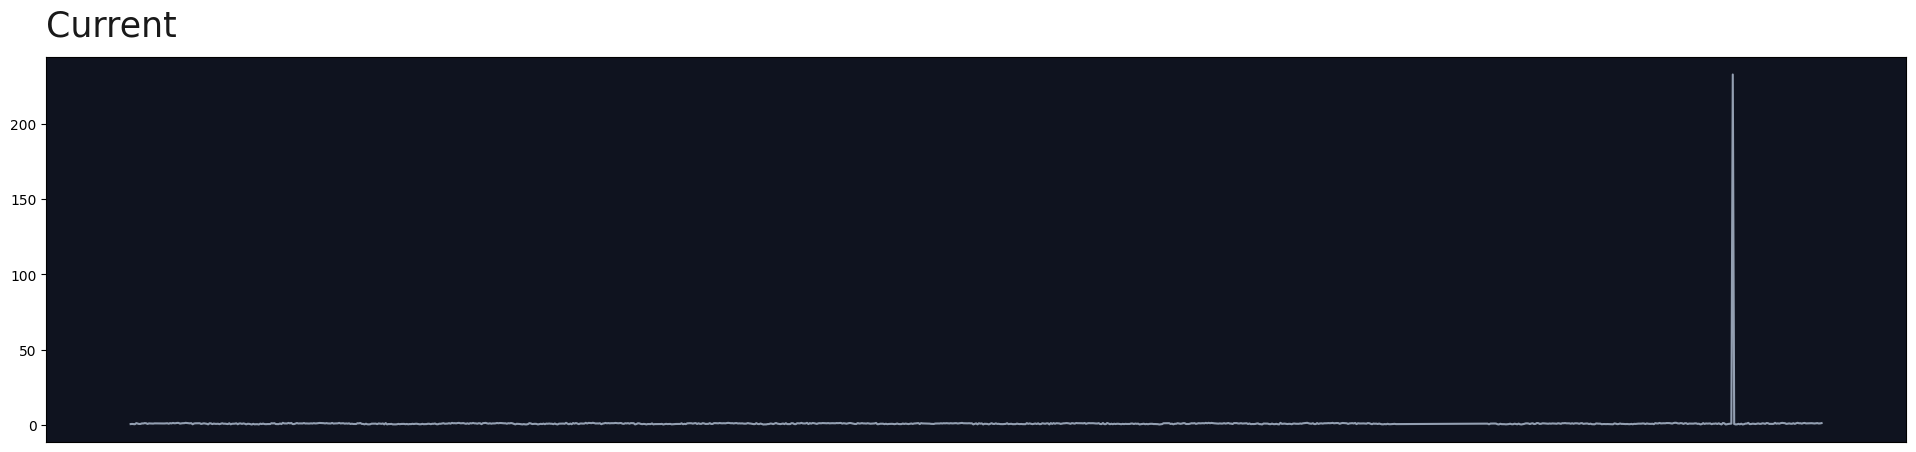

In [124]:
fig, ax = plt.subplots(figsize=(24,5))
ax.set_facecolor(background_d)
ax.grid(color='gray', linestyle='--', axis='both', zorder=0, dashes=(1,5))
sns.lineplot(df, x='datetime',y='Current', label='Current', color='#939FB1')
ax.set_xticks([])
ax.set_title('Current',loc='left', fontsize=25, pad=15, alpha=0.9)
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend().set_visible(False)

4) Pressure

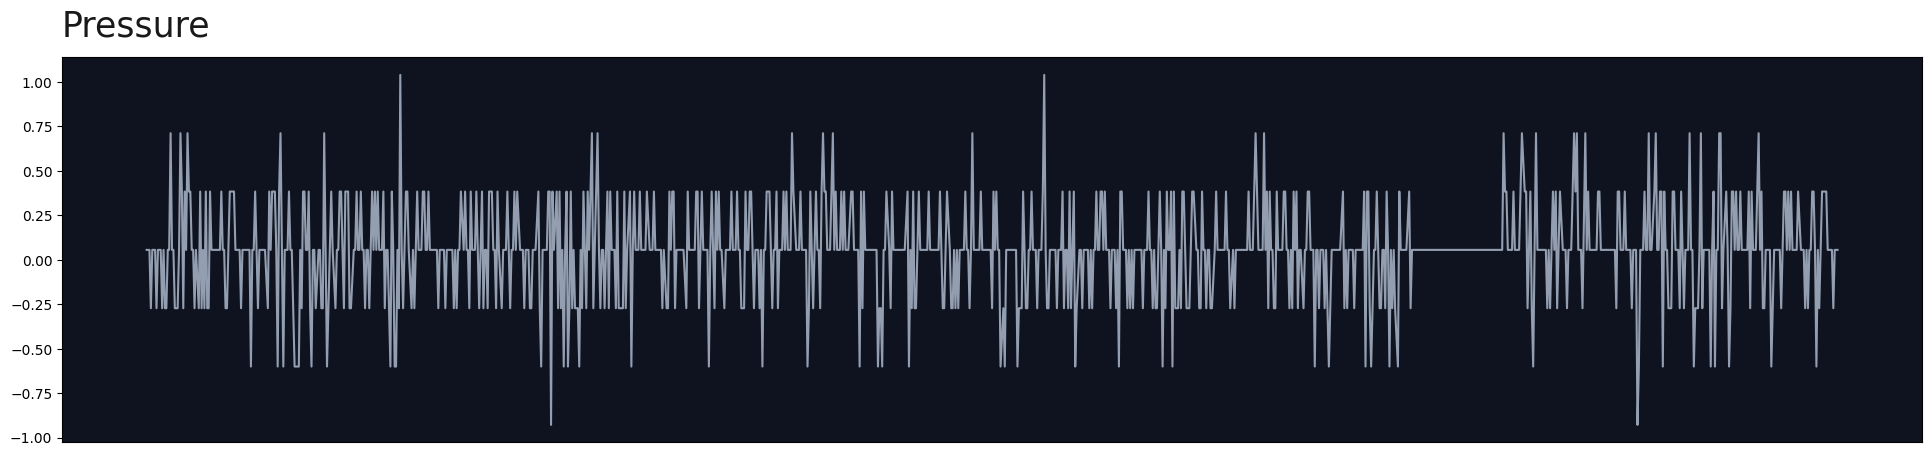

In [125]:
fig, ax = plt.subplots(figsize=(24,5))
ax.set_facecolor(background_d)
ax.grid(color='gray', linestyle='--', axis='both', zorder=0, dashes=(1,5))
sns.lineplot(df, x='datetime',y='Pressure', label='Pressure', color='#939FB1')
ax.set_xticks([])
ax.set_title('Pressure',loc='left', fontsize=25, pad=15, alpha=0.9)
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend().set_visible(False)

5) Temperature

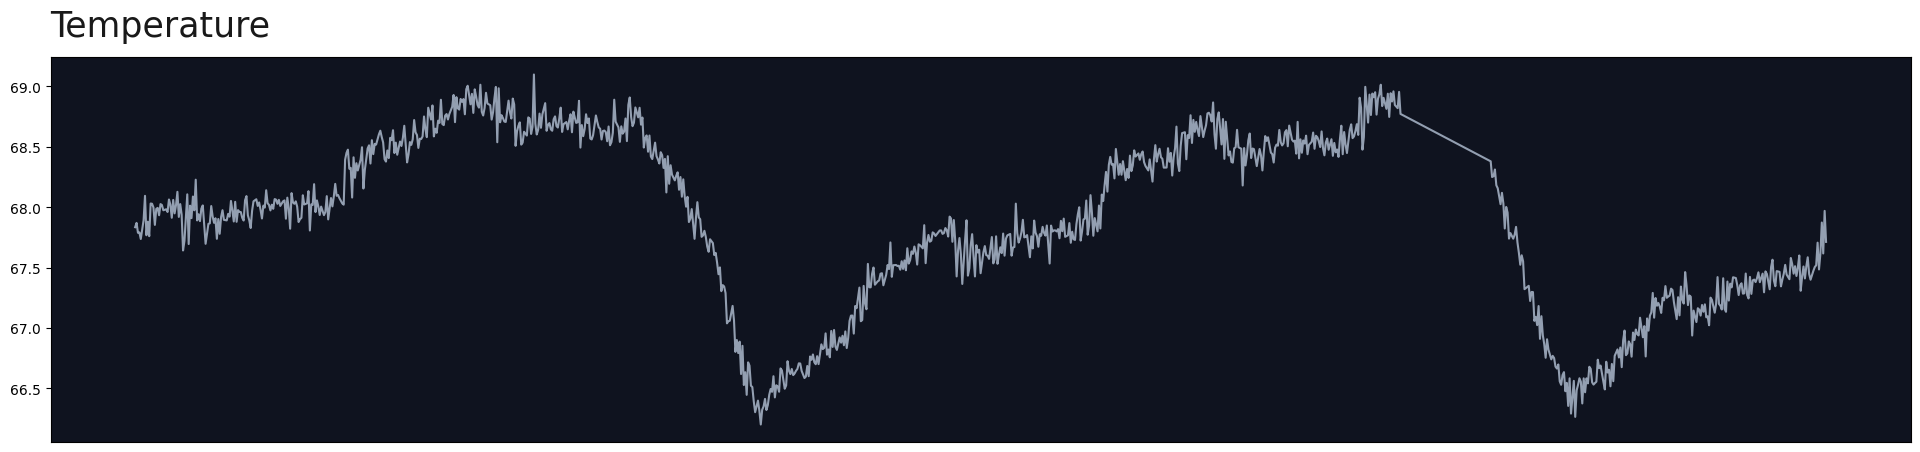

In [126]:
fig, ax = plt.subplots(figsize=(24,5))
ax.set_facecolor(background_d)
ax.grid(color='gray', linestyle='--', axis='both', zorder=0, dashes=(1,5))
sns.lineplot(df, x='datetime',y='Temperature', label='Temperature', color='#939FB1')
ax.set_xticks([])
ax.set_title('Temperature',loc='left', fontsize=25, pad=15, alpha=0.9)
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend().set_visible(False)

6) Thermocouple

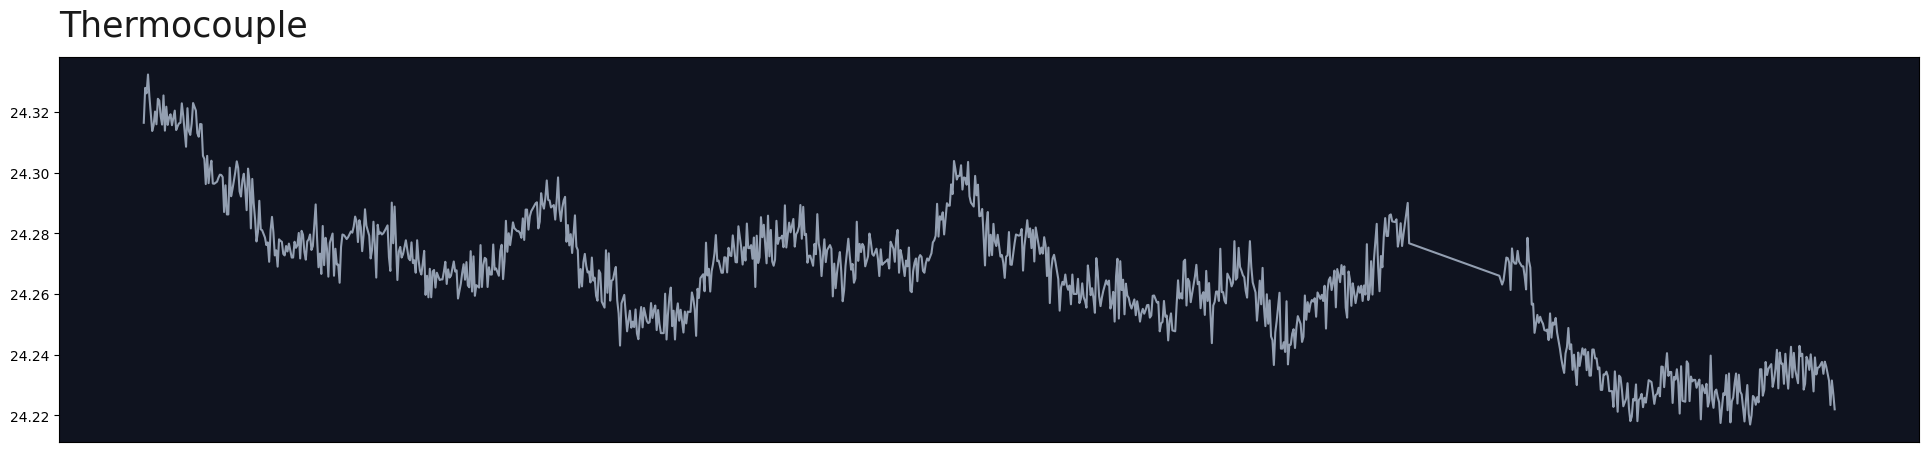

In [127]:
fig, ax = plt.subplots(figsize=(24,5))
ax.set_facecolor(background_d)
sns.lineplot(df, x='datetime',y='Thermocouple', label='Thermocouple', color='#939FB1')
ax.set_xticks([])
ax.set_title('Thermocouple',loc='left', fontsize=25, pad=15, alpha=0.9)
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend().set_visible(False)

7) Voltage

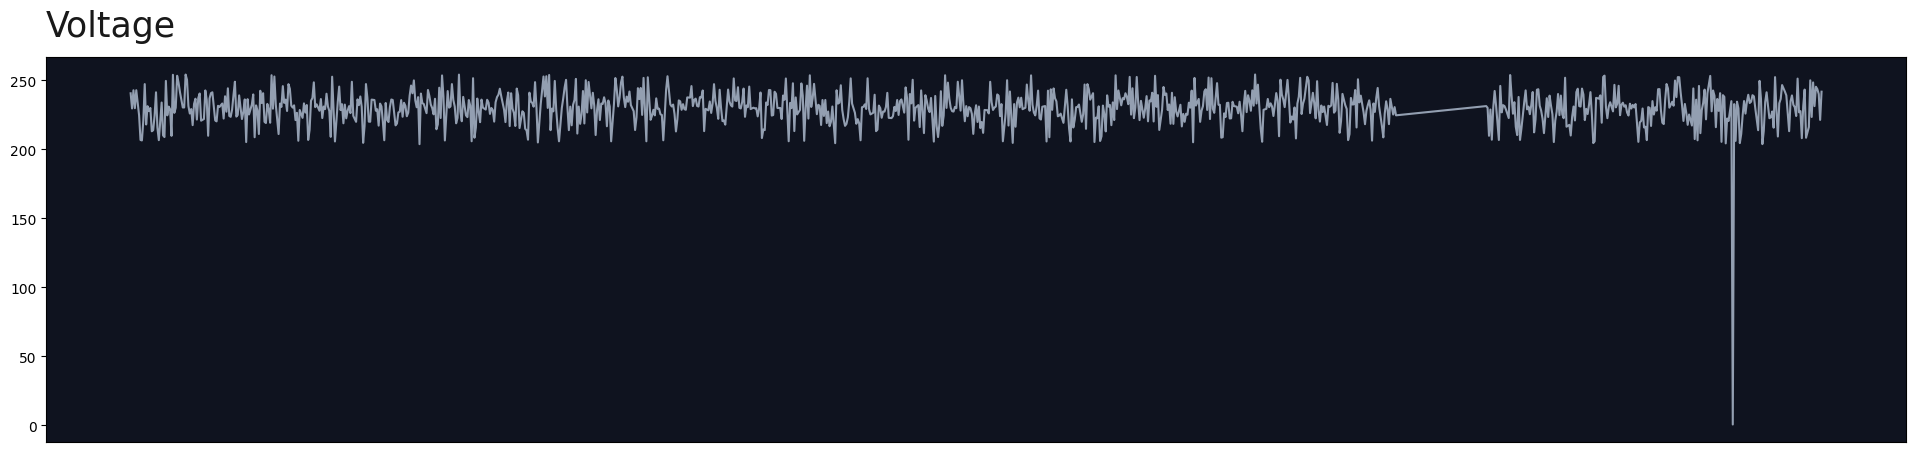

In [128]:
fig, ax = plt.subplots(figsize=(24,5))
ax.set_facecolor(background_d)
sns.lineplot(df, x='datetime',y='Voltage', label='Voltage', color='#939FB1')
ax.set_xticks([])
ax.set_title('Voltage',loc='left', fontsize=25, pad=15, alpha=0.9)
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend().set_visible(False)

8) Volumne Flow RateRMS

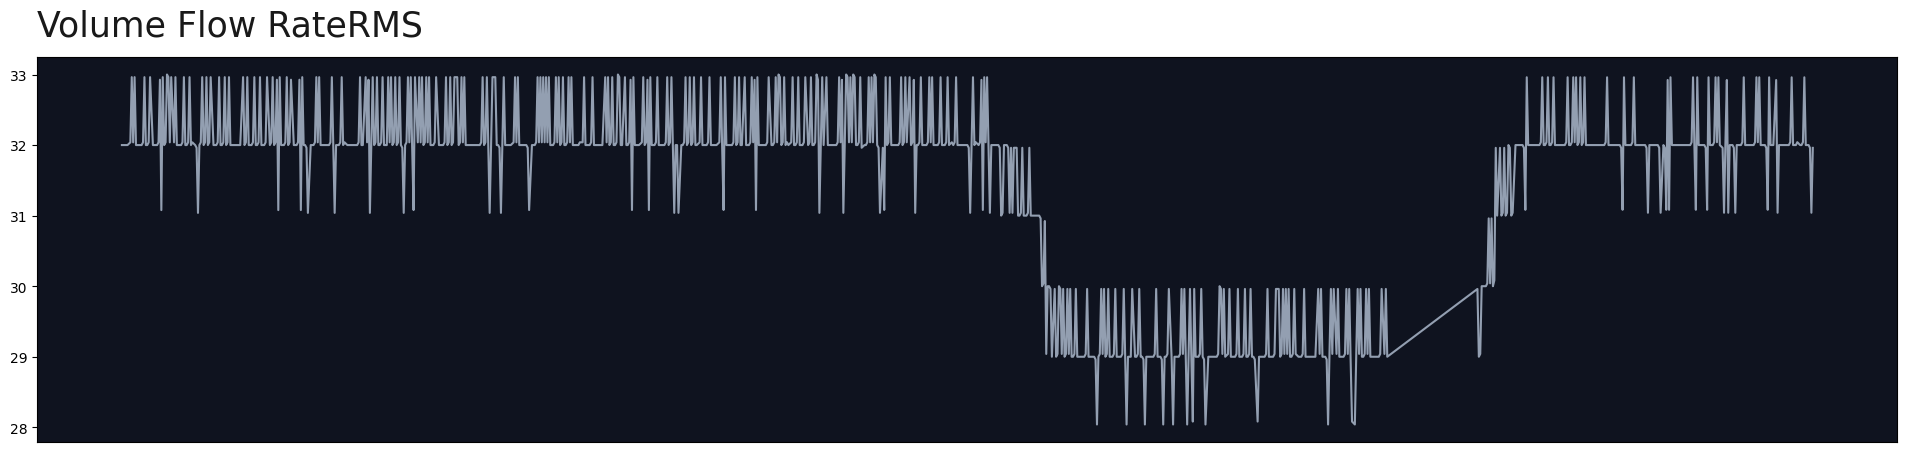

In [129]:
fig, ax = plt.subplots(figsize=(24,5))
ax.set_facecolor(background_d)
sns.lineplot(df, x='datetime',y='Volume Flow RateRMS', label='Volume Flow RateRMS', color='#939FB1')
ax.set_xticks([])
ax.set_title('Volume Flow RateRMS',loc='left', fontsize=25, pad=15, alpha=0.9)
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend().set_visible(False)

참고

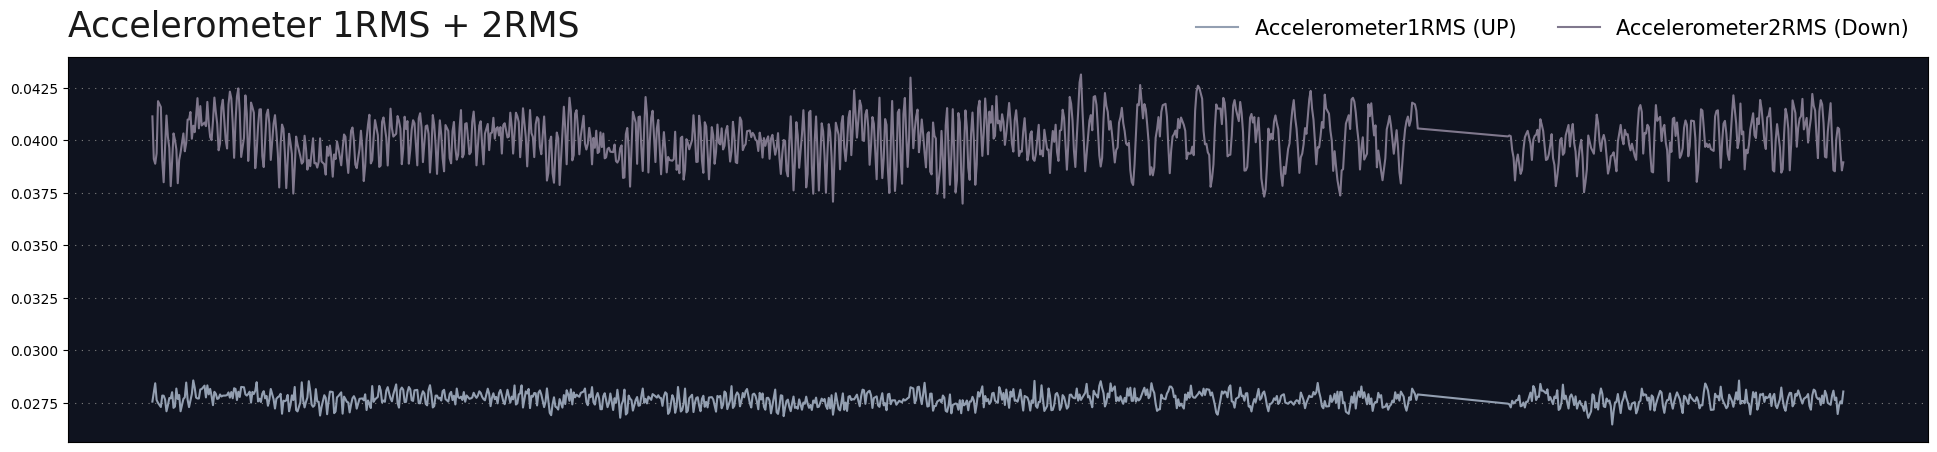

In [123]:
fig, ax = plt.subplots(figsize=(24,5))
ax.set_facecolor(background_d)
ax.grid(color='gray', linestyle='--', axis='both', zorder=0, dashes=(1,5))
sns.lineplot(df, x='datetime',y='Accelerometer1RMS', label='Accelerometer1RMS (UP)', color='#939FB1')
sns.lineplot(df, x='datetime',y='Accelerometer2RMS', label='Accelerometer2RMS (Down)', color='#80788D')
ax.set_xticks([])
ax.set_title('Accelerometer 1RMS + 2RMS',loc='left', fontsize=25, pad=15, alpha=0.9)
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend(loc='upper right', ncol=2, bbox_to_anchor=(1,1.15), facecolor='white', edgecolor='white', fontsize=15)

3. anomaly가 1인 데이터 (Trend Graph 위 표시)

In [133]:
anomal_df = df.loc[df.anomaly==1]
print(len(anomal_df))

333


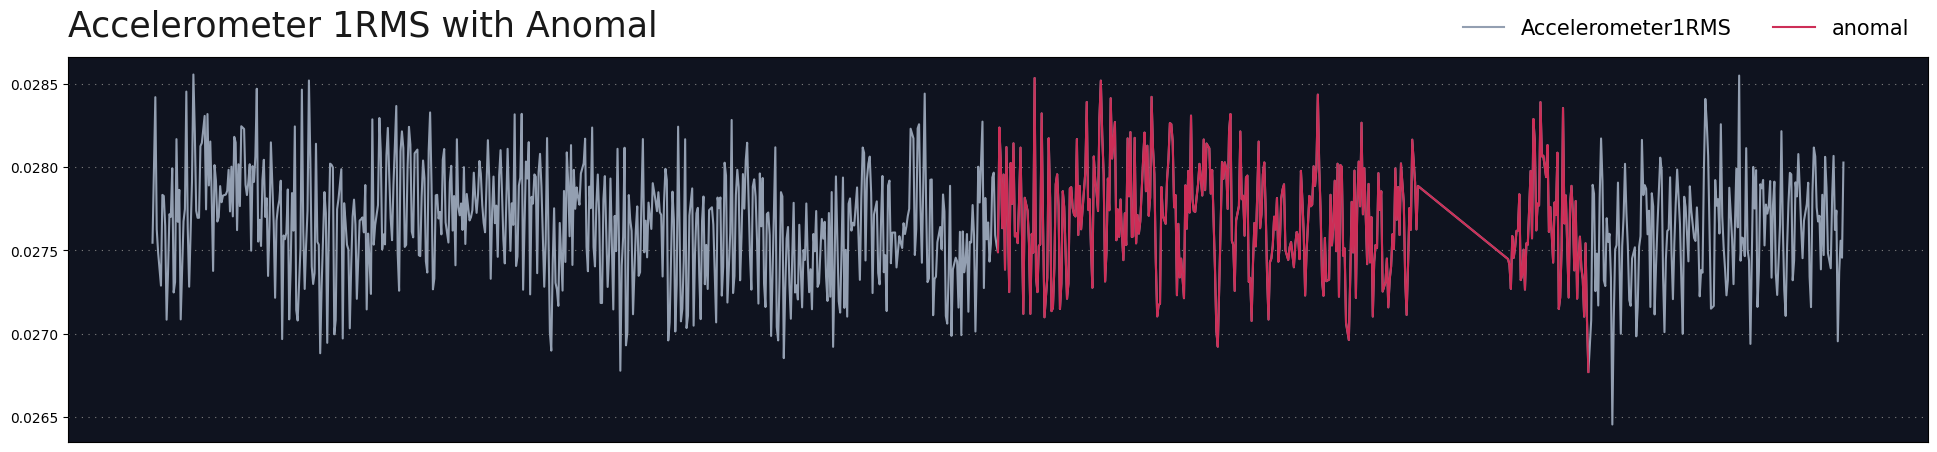

In [143]:
fig, ax = plt.subplots(figsize=(24,5))
ax.set_facecolor(background_d)
ax.grid(color='gray', linestyle='--', axis='both', zorder=0, dashes=(1,5))
sns.lineplot(df, x='datetime',y='Accelerometer1RMS', label='Accelerometer1RMS', color='#939FB1')
sns.lineplot(anomal_df, x='datetime', y='Accelerometer1RMS', label='anomal', color='#CD2E57')
ax.set_xticks([])
ax.set_title('Accelerometer 1RMS with Anomal',loc='left', fontsize=25, pad=15, alpha=0.9)
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend(loc='upper right', ncol=2, bbox_to_anchor=(1,1.15), facecolor='white', edgecolor='white', fontsize=15)

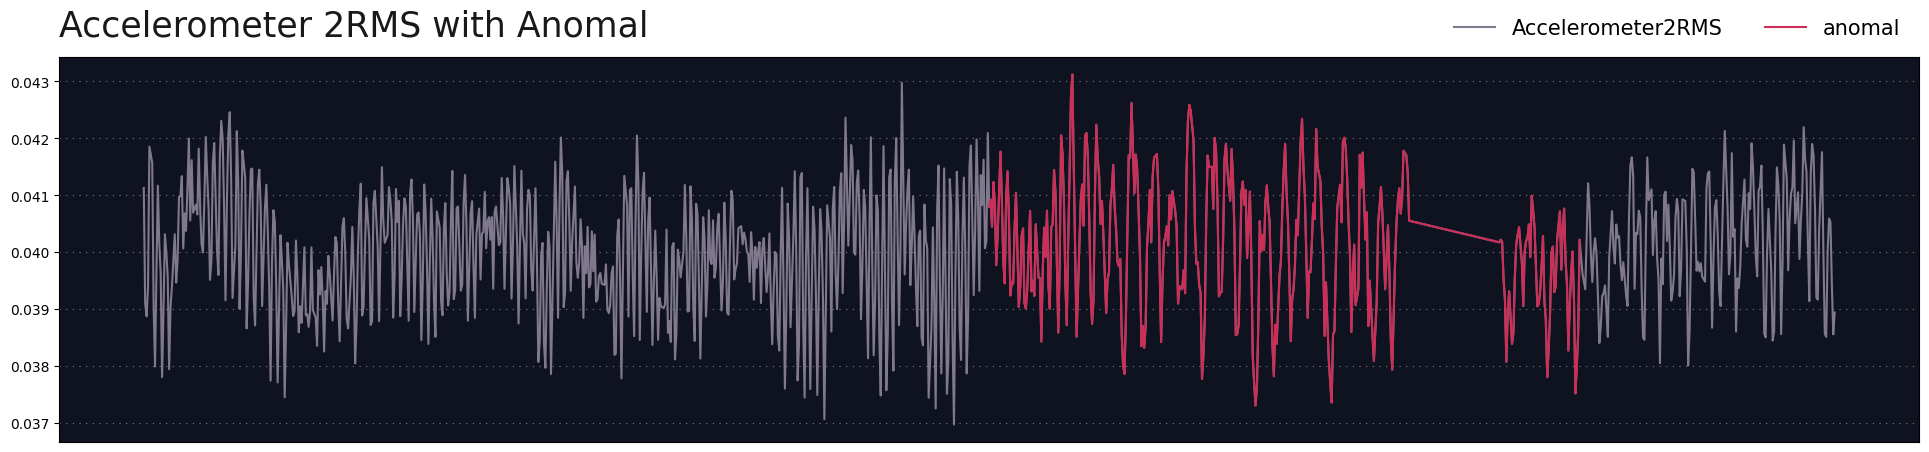

In [146]:
fig, ax = plt.subplots(figsize=(24,5))
ax.set_facecolor(background_d)
ax.grid(color='gray', linestyle='--', axis='both', zorder=0, dashes=(1,5))
sns.lineplot(df, x='datetime',y='Accelerometer2RMS', label='Accelerometer2RMS', color='#80788D')
sns.lineplot(anomal_df, x='datetime', y='Accelerometer2RMS', label='anomal', color='#CD2E57')
ax.set_xticks([])
ax.set_title('Accelerometer 2RMS with Anomal',loc='left', fontsize=25, pad=15, alpha=0.9)
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend(loc='upper right', ncol=2, bbox_to_anchor=(1,1.15), facecolor='white', edgecolor='white', fontsize=15)

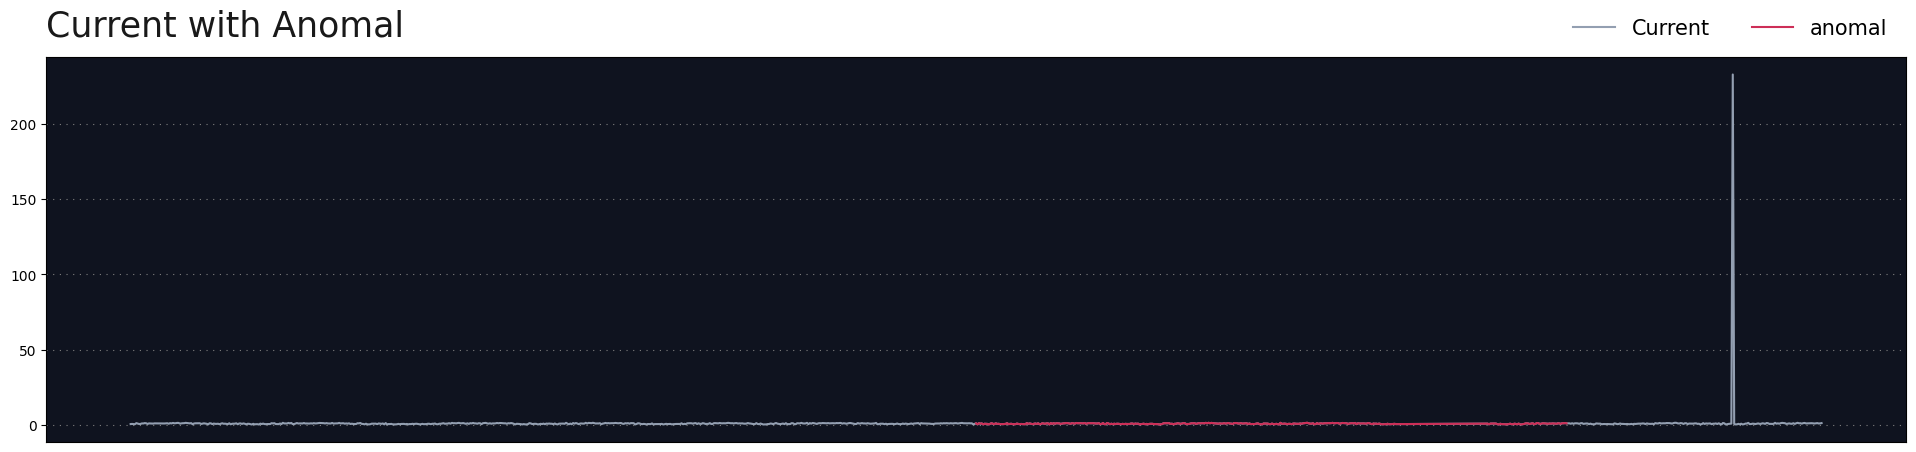

In [147]:
fig, ax = plt.subplots(figsize=(24,5))
ax.set_facecolor(background_d)
ax.grid(color='gray', linestyle='--', axis='both', zorder=0, dashes=(1,5))
sns.lineplot(df, x='datetime',y='Current', label='Current', color='#939FB1')
sns.lineplot(anomal_df, x='datetime', y='Current', label='anomal', color='#CD2E57')
ax.set_xticks([])
ax.set_title('Current with Anomal',loc='left', fontsize=25, pad=15, alpha=0.9)
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend(loc='upper right', ncol=2, bbox_to_anchor=(1,1.15), facecolor='white', edgecolor='white', fontsize=15)

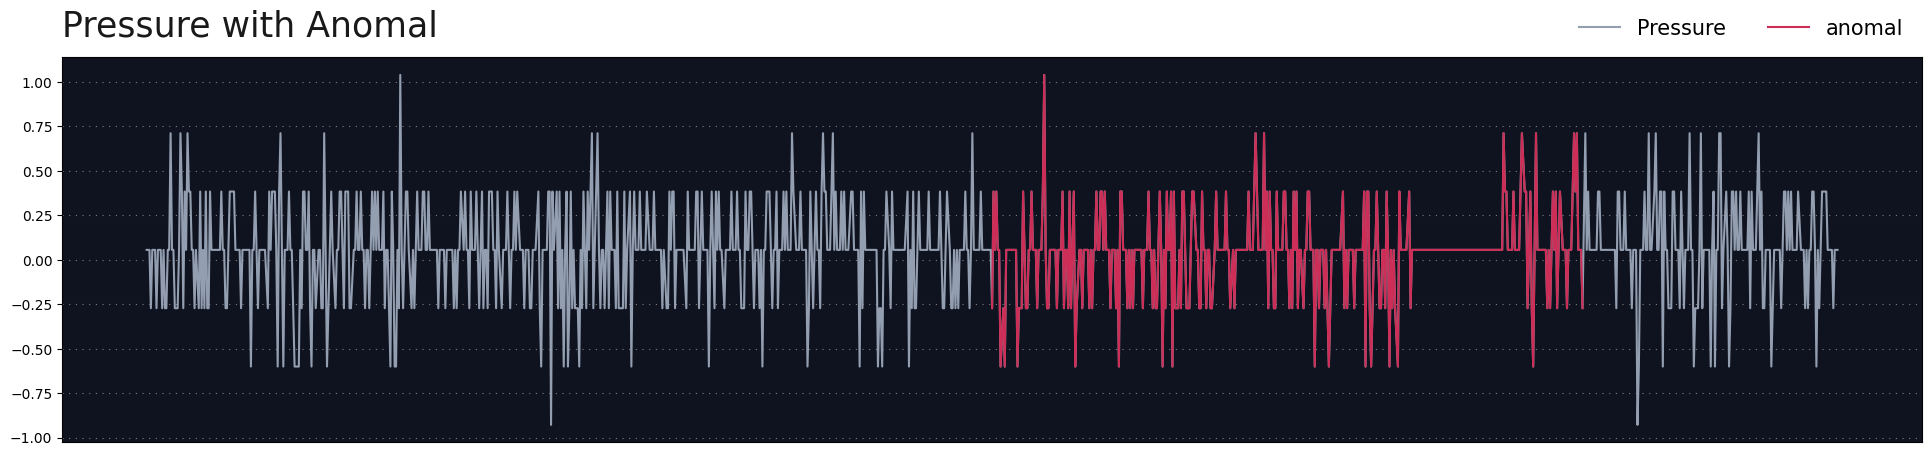

In [148]:
fig, ax = plt.subplots(figsize=(24,5))
ax.set_facecolor(background_d)
ax.grid(color='gray', linestyle='--', axis='both', zorder=0, dashes=(1,5))
sns.lineplot(df, x='datetime',y='Pressure', label='Pressure', color='#939FB1')
sns.lineplot(anomal_df, x='datetime', y='Pressure', label='anomal', color='#CD2E57')
ax.set_xticks([])
ax.set_title('Pressure with Anomal',loc='left', fontsize=25, pad=15, alpha=0.9)
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend(loc='upper right', ncol=2, bbox_to_anchor=(1,1.15), facecolor='white', edgecolor='white', fontsize=15)

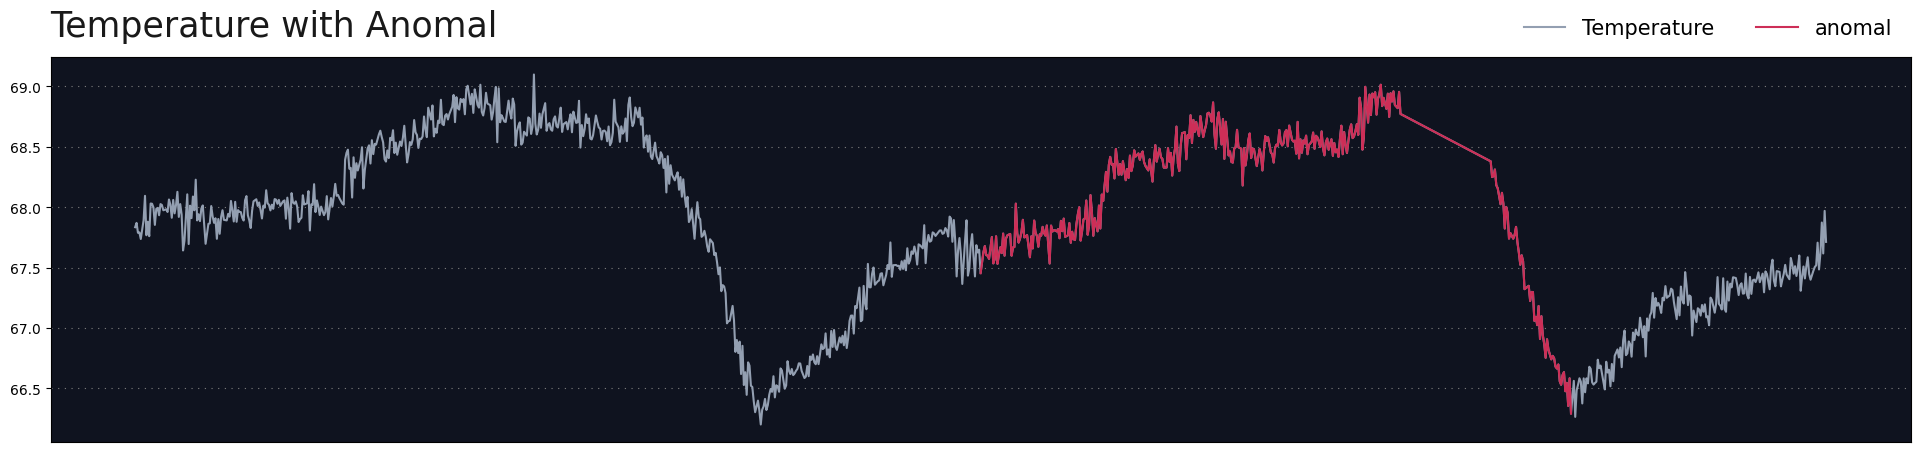

In [149]:
fig, ax = plt.subplots(figsize=(24,5))
ax.set_facecolor(background_d)
ax.grid(color='gray', linestyle='--', axis='both', zorder=0, dashes=(1,5))
sns.lineplot(df, x='datetime',y='Temperature', label='Temperature', color='#939FB1')
sns.lineplot(anomal_df, x='datetime', y='Temperature', label='anomal', color='#CD2E57')
ax.set_xticks([])
ax.set_title('Temperature with Anomal',loc='left', fontsize=25, pad=15, alpha=0.9)
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend(loc='upper right', ncol=2, bbox_to_anchor=(1,1.15), facecolor='white', edgecolor='white', fontsize=15)

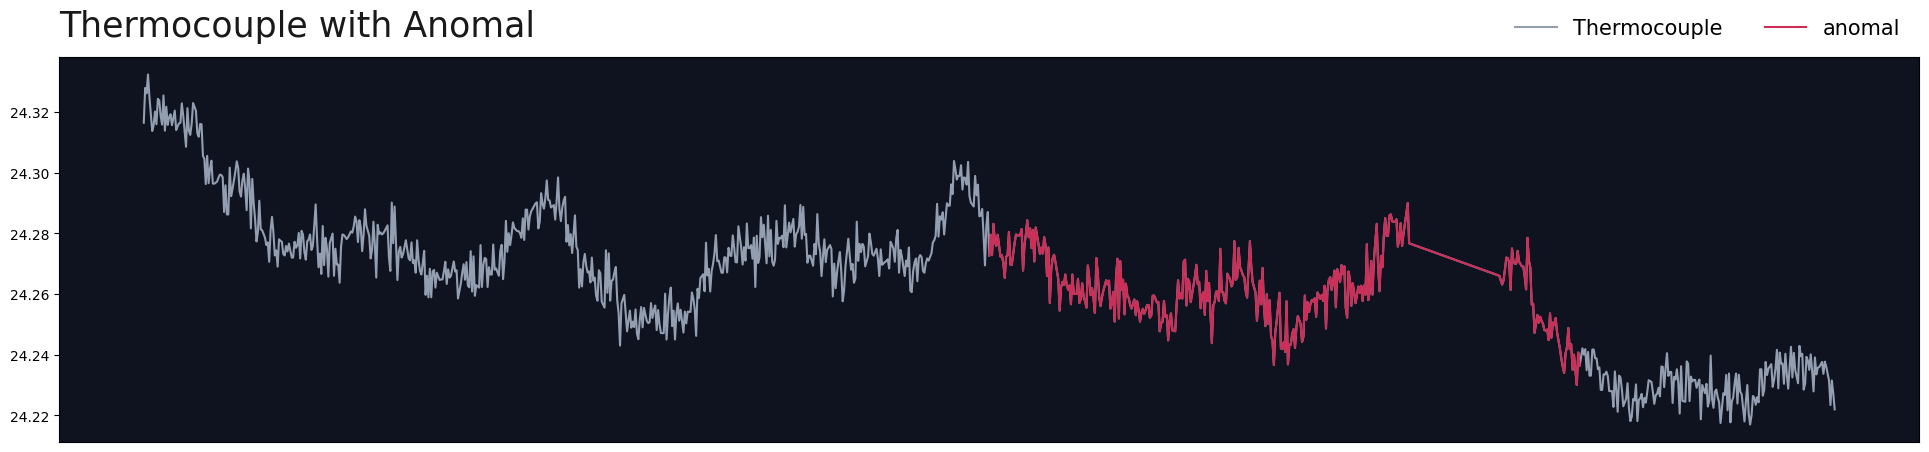

In [150]:
fig, ax = plt.subplots(figsize=(24,5))
ax.set_facecolor(background_d)
sns.lineplot(df, x='datetime',y='Thermocouple', label='Thermocouple', color='#939FB1')
sns.lineplot(anomal_df, x='datetime', y='Thermocouple', label='anomal', color='#CD2E57')
ax.set_xticks([])
ax.set_title('Thermocouple with Anomal',loc='left', fontsize=25, pad=15, alpha=0.9)
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend(loc='upper right', ncol=2, bbox_to_anchor=(1,1.15), facecolor='white', edgecolor='white', fontsize=15)

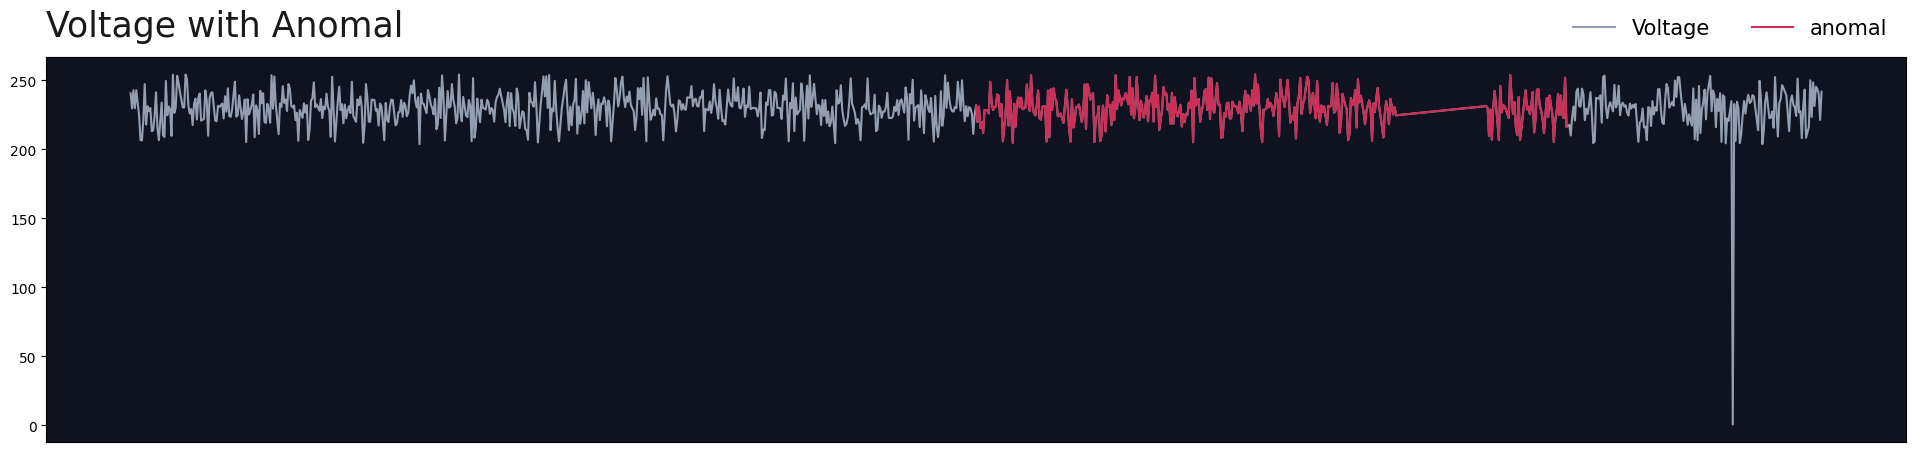

In [151]:
fig, ax = plt.subplots(figsize=(24,5))
ax.set_facecolor(background_d)
sns.lineplot(df, x='datetime',y='Voltage', label='Voltage', color='#939FB1')
sns.lineplot(anomal_df, x='datetime', y='Voltage', label='anomal', color='#CD2E57')
ax.set_xticks([])
ax.set_title('Voltage with Anomal',loc='left', fontsize=25, pad=15, alpha=0.9)
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend(loc='upper right', ncol=2, bbox_to_anchor=(1,1.15), facecolor='white', edgecolor='white', fontsize=15)

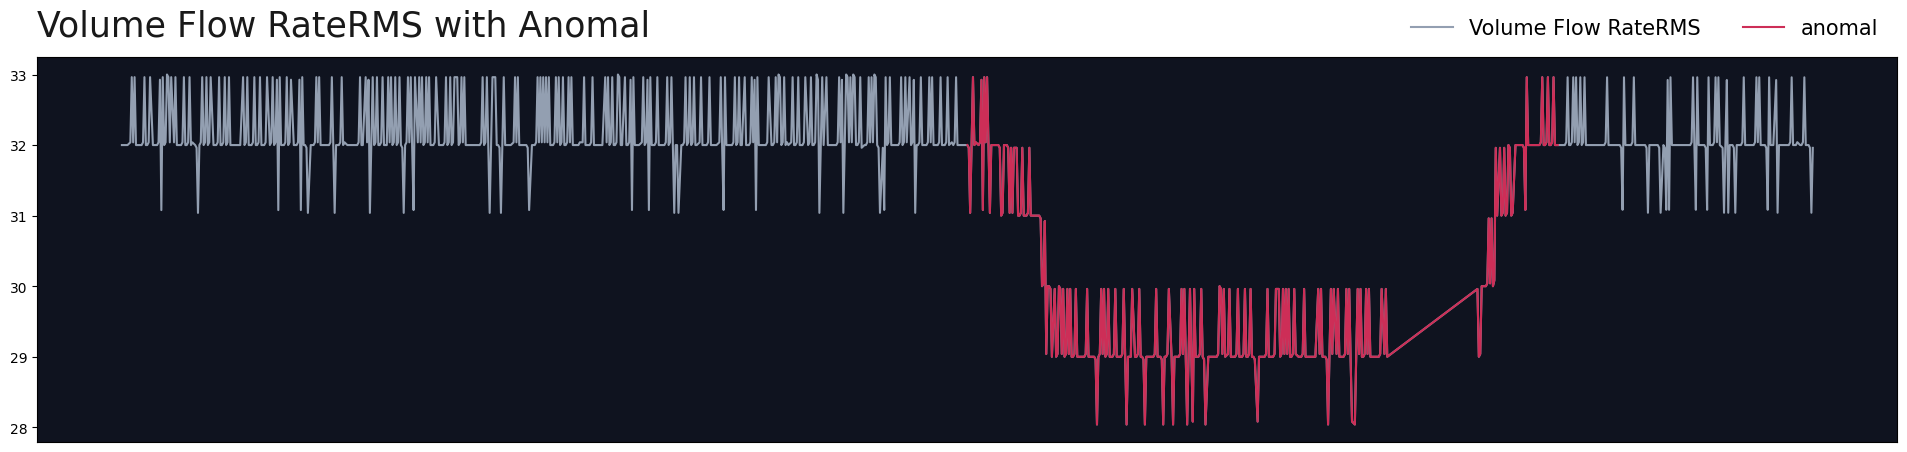

In [152]:
fig, ax = plt.subplots(figsize=(24,5))
ax.set_facecolor(background_d)
sns.lineplot(df, x='datetime',y='Volume Flow RateRMS', label='Volume Flow RateRMS', color='#939FB1')
sns.lineplot(anomal_df, x='datetime', y='Volume Flow RateRMS', label='anomal', color='#CD2E57')
ax.set_xticks([])
ax.set_title('Volume Flow RateRMS with Anomal',loc='left', fontsize=25, pad=15, alpha=0.9)
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend(loc='upper right', ncol=2, bbox_to_anchor=(1,1.15), facecolor='white', edgecolor='white', fontsize=15)

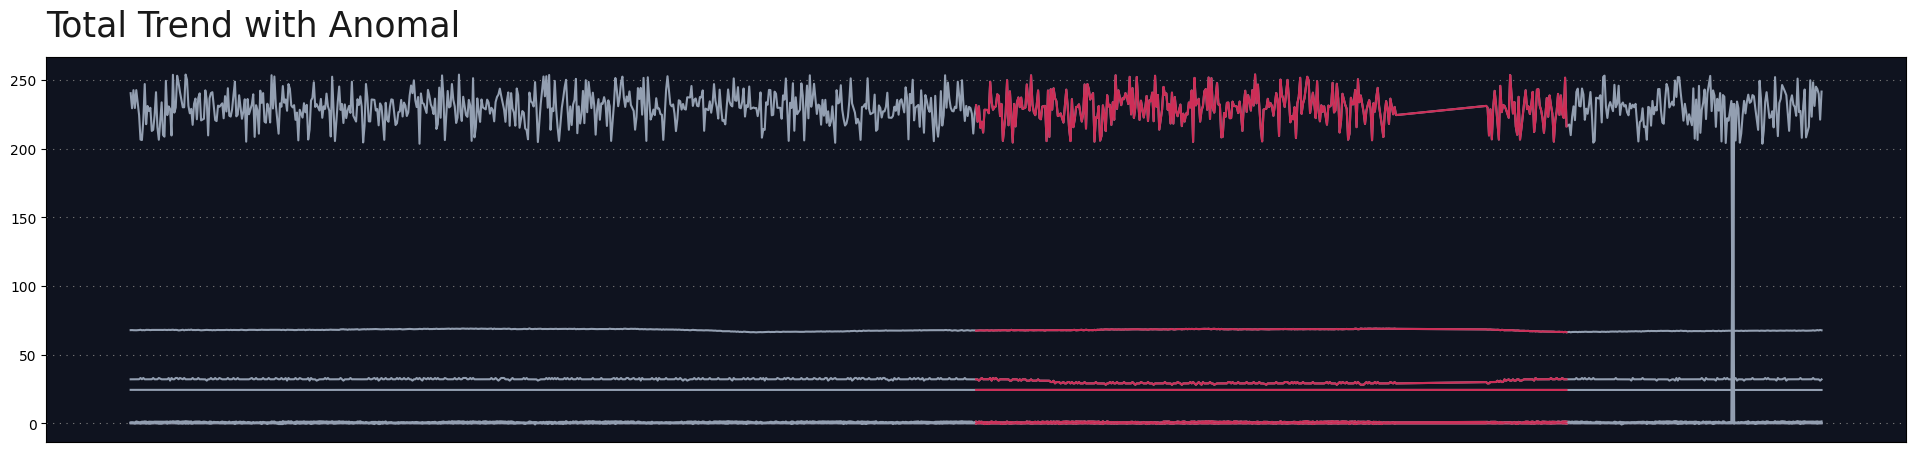

In [153]:
fig, ax = plt.subplots(figsize=(24,5))
ax.set_facecolor(background_d)
ax.grid(color='gray', linestyle='--', axis='both', zorder=0, dashes=(1,5))
sns.lineplot(df, x='datetime',y='Accelerometer1RMS', label='Accelerometer1RMS', color='#939FB1')
sns.lineplot(anomal_df, x='datetime', y='Accelerometer1RMS', label='anomal', color='#CD2E57')
sns.lineplot(df, x='datetime',y='Accelerometer2RMS', label='Accelerometer2RMS', color='#80788D')
sns.lineplot(anomal_df, x='datetime', y='Accelerometer2RMS', label='anomal', color='#CD2E57')
sns.lineplot(df, x='datetime',y='Current', label='Current', color='#939FB1')
sns.lineplot(anomal_df, x='datetime', y='Current', label='anomal', color='#CD2E57')
sns.lineplot(df, x='datetime',y='Pressure', label='Pressure', color='#939FB1')
sns.lineplot(anomal_df, x='datetime', y='Pressure', label='anomal', color='#CD2E57')
sns.lineplot(df, x='datetime',y='Temperature', label='Temperature', color='#939FB1')
sns.lineplot(anomal_df, x='datetime', y='Temperature', label='anomal', color='#CD2E57')
sns.lineplot(df, x='datetime',y='Thermocouple', label='Thermocouple', color='#939FB1')
sns.lineplot(anomal_df, x='datetime', y='Thermocouple', label='anomal', color='#CD2E57')
sns.lineplot(df, x='datetime',y='Voltage', label='Voltage', color='#939FB1')
sns.lineplot(anomal_df, x='datetime', y='Voltage', label='anomal', color='#CD2E57')
sns.lineplot(df, x='datetime',y='Volume Flow RateRMS', label='Volume Flow RateRMS', color='#939FB1')
sns.lineplot(anomal_df, x='datetime', y='Volume Flow RateRMS', label='anomal', color='#CD2E57')
ax.set_xticks([])
ax.set_title('Total Trend with Anomal',loc='left', fontsize=25, pad=15, alpha=0.9)
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend().set_visible(False)

### Question 03

```
'anomaly가 1인 이상 데이터와 정상 데이터의 다른 특성들이 어떤 것들이 있는지 자유롭게 추가 EDA를 진행하시오.

```

## **🔒 [금융] 문제**
---
* **제시된 금융 데이터(Non Time-Series)를 대상으로 아래 주어진 문제를 분석 및 시각화 하시오**

* 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|step|1step이 1시간인 시간 단위|
|type|온라인 거래유형|
|amount|거래 금액|
|nameOrig|거래 시작 고객|
|oldbalanceOrg|거래 전 잔액|
|newbalanceOrig|거래 후 잔액|
|nameDest|거래 수신 고객|
|oldbalanceDest|거래 전 수취인의 초기 잔액|
|newbalanceDest|거래 후 받는 사람의 새 잔액|
|isFraud|사기 거래|
|isFlaggedFraud|의심사기거래|


In [ ]:
import pandas as pd
df = pd.read_csv('example_2.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Question 01

```
Data Read하고 상위 전처리 조건을 적용한 DataFrame을 만드시오.

  (1) Data shape(형태) 출력 → 전체 데이터의 Row와 Column개수 출력

  (2) Data type 확인 → 각 Column별 Data Type 출력

  (3) Null값 확인 (※ 빈 값의 Data) → 각 Column별 Null Value의 개수 출력
```

### Question 02

```
01번 문제에서 Read한 데이터를 활용하여, 다음 지표들을 추출하시오.

  (1) 'isFraud' Column을 활용하여, 전체 사기율(%)을 계산하시오.

  (2) 'type'에 따른 사기율(%)을 계산하시오.

  (3) 사기거래와 사기거래가 아닌 거래의 amount의 분포를 비교하시오.
  (※ isFraud가 1인 데이터 1000개를 Sampling하고 isFraud가 0인 데이터를 1000개를 Sampling하여 시각화 할 것)

```

### Question 03

```
사기거래와 정상거래의 특성을 자유롭게 추가 EDA분석 하시오.
```


## **🔒 [게임] 문제**
---
* **제시된 게임 플레이 데이터(Non Time-Series)를 대상으로 아래 주어진 문제를 분석 및 시각화 하시오**

* 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|ID |ID|
|groupId |매치 내에서 그룹을 식별하는 ID|
|matchId |매치를 식별하는 ID|
|assists |이 플레이어가 공격하여 팀원이 죽인 적 플레이어의 수|
|boosts |사용한 부스트 아이템의 수|
|damageDealt |총 가한 피해량|
|DBNOs |적 플레이어를 다운시킨 횟수|
|headshotKills |헤드샷킬수|
|heals |heal 아이템 사용횟수|
|killPlace |매치 내 순위(적 플레이어를 죽인 횟수에 따른)|
|killPoints |적제압포인트|
|kills |적 제압횟수|
|killStreaks |짧은 시간 내에 적 플레이어를 죽인 최대 횟수|
|longestKill |적을 죽은시점에서 나와 죽은적의 거리(다운 시킨 후 차량으로 이동한 경우 큰 데이터가 발생할 수 있음|
|maxPlace |최악의 순위|
|numGroups |그룹넘버|
|revives |팀원을 부활시킨 횟수|
|rideDistance |이동수단 타고 이동거리|
|roadKills |차량 내에서 이루어진 적 제압횟수|
|swimDistance|수영한거리|
|teamKills |같은 팀원을 제압한 횟수|
|vehicleDestroys|자동차 파괴횟수|
|walkDistance|도보이동거리|
|weaponsAcquired|무기 획득횟수|
|winPoints|승점|
|winPlacePerc|승률|


In [ ]:
import pandas as pd
df = pd.read_csv('example_3.csv')
df.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,24,0,0,5,247.30,2,0,4,...,1,591.3,0,0.0,0,0,782.40,4,1458,0.8571
1,1,1,440875,1,1,0,37.65,1,1,0,...,0,0.0,0,0.0,0,0,119.60,3,1511,0.0400
2,2,2,878242,2,0,1,93.73,1,0,2,...,1,0.0,0,0.0,0,0,3248.00,5,1583,0.7407
3,3,3,1319841,3,0,0,95.88,0,0,0,...,0,0.0,0,0.0,0,0,21.49,1,1489,0.1146
4,4,4,1757883,4,0,1,0.00,0,0,1,...,0,0.0,0,0.0,0,0,640.80,4,1475,0.5217


### Question 01

```
Data Read하고 상위 전처리 조건을 적용한 DataFrame을 만드시오.

  (1) Data shape(형태) 출력 → 전체 데이터의 Row와 Column개수 출력

  (2) Data type 확인 → 각 Column별 Data Type 출력

  (3) Null값 확인 (※ 빈 값의 Data) → 각 Column별 Null Value의 개수 출력
```

### Question 02

```
다음 가설들을 데이터 분석을 통해 검증하시오.

[가설]
Without moving & WeaponsAcquired - analyze
 : 이동 없이 무기를 획득한 버그 유저가 존재할까?

  (1) _totalDistance가 하위 10%인 Data set을 만드시오.
  (※ '_totalDistance' = 'rideDistance' + 'walkDistance' + 'swimDistance')

  (2) 1번에서 만든 Data set에서 weaponsAcquired가 상위 1%인 버그의심 유저 수를 출력하시오.

```

### Question 03

```
상위 가설 이외에 주어진 데이터를 활용하여 다른 Action을 하는 버그 유저들을 식별하시오.
```